In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from scipy.optimize import curve_fit
#import uncertainties
def function(x,*p): #
    a, b = p
    
    return a * x + b

In [9]:
df=pd.read_csv("Laser_A_I.csv")
df["Uncert I in mA"]=0.1*np.ones(len(df["Strom/mA"]))
tempArray=np.concatenate((0.02*np.ones(3), 0.2*np.ones(14), 2*np.ones(13)))
df["Uncert P in microW"]=tempArray
print(df.to_string())

    Strom/mA  Leistung/microW  Uncert I in mA  Uncert P in microW
0        0.0             2.03             0.1                0.02
1        3.0             5.39             0.1                0.02
2        6.4            10.39             0.1                0.02
3        7.6            12.40             0.1                0.20
4        9.4            15.50             0.1                0.20
5       11.8            20.10             0.1                0.20
6       15.1            27.10             0.1                0.20
7       18.0            34.20             0.1                0.20
8       21.0            42.30             0.1                0.20
9       24.0            50.90             0.1                0.20
10      27.0            61.50             0.1                0.20
11      30.1            74.60             0.1                0.20
12      33.1            90.80             0.1                0.20
13      34.5           101.60             0.1                0.20
14      36

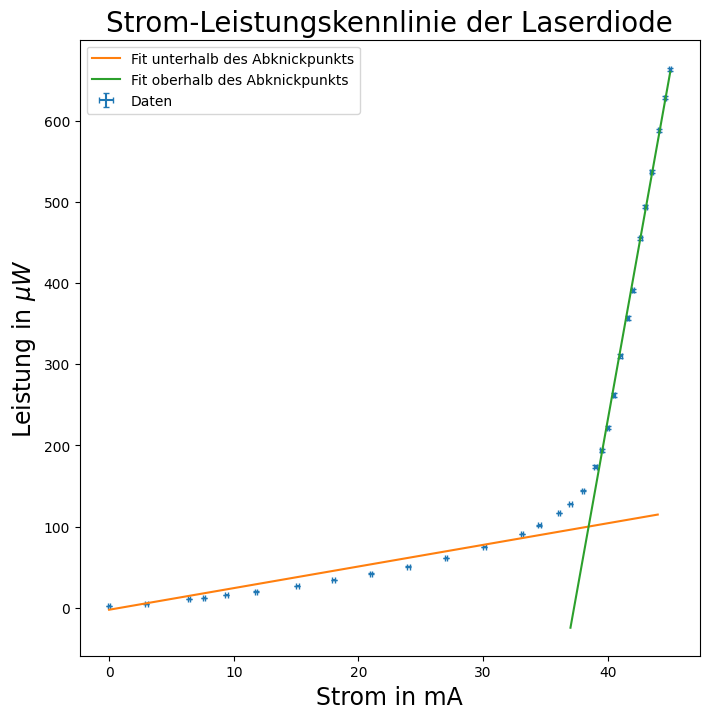

In [19]:
#plt.errorbar(df["Strom/mA"], df["Leistung/microW"], df["Uncert P in microW"], df["Uncert I in mA"], fmt='none')
fig, axs = plt.subplots(1,1,figsize=(8, 8))

axs.errorbar(df["Strom/mA"], df["Leistung/microW"], df["Uncert P in microW"], df["Uncert I in mA"],linestyle='none',capsize = 2, label="Daten")
InitialValues = [1,0]

OptimalValues_under, CovarianceMatrix_under = curve_fit(function,df["Strom/mA"][:17],
                                                        df["Leistung/microW"][:17],sigma = df["Uncert P in microW"][:17],p0 = InitialValues)
axs.plot(np.arange(0.0,45,1.0),function(np.arange(0.0,45,1.0),*OptimalValues_under), label = 'Fit unterhalb des Abknickpunkts')

OptimalValues_over, CovarianceMatrix_over = curve_fit(function,df["Strom/mA"][17:],
                                                      df["Leistung/microW"][17:],sigma = df["Uncert P in microW"][17:],p0 = InitialValues)
axs.plot(np.arange(37,46,1.0),function(np.arange(37,46,1.0),*OptimalValues_over), label = 'Fit oberhalb des Abknickpunkts')

axs.set_ylabel(r"Leistung in $\mu W$", size=17)
axs.set_xlabel(r"Strom in mA", size=17)
plt.title("Strom-Leistungskennlinie der Laserdiode", size=20)
plt.legend()

plt.show()

In [20]:
print(OptimalValues_under)
temp1=np.diag(CovarianceMatrix_under)
print(np.diag(CovarianceMatrix_under))
print(OptimalValues_over)
temp2=np.diag(CovarianceMatrix_over)
print(np.diag(CovarianceMatrix_over))

[ 2.66290287 -2.27645064]
[0.05715488 2.70984209]
[   85.50914583 -3188.24594458]
[2.92469830e+00 5.17717494e+03]


In [12]:
#find intersection of two fitted lines
x0=(OptimalValues_over[1]-OptimalValues_under[1])/(OptimalValues_under[0]-OptimalValues_over[0])
y0=OptimalValues_under[0]*x0+OptimalValues_under[1]
print(x0, y0) #this one deliveres a better approximation than the following one

38.4564149219285 100.12924693929345


In [13]:
a1=uncertainties.ufloat(OptimalValues_under[0], temp1[0])
b1=uncertainties.ufloat(OptimalValues_under[1], temp1[1])
a2=uncertainties.ufloat(OptimalValues_over[0], temp2[0])
b2=uncertainties.ufloat(OptimalValues_over[1], temp2[1])
x0=(b2-b1)/(a1-a2)
y0=a1*x0+b1
print(x0)

NameError: name 'uncertainties' is not defined

In [14]:
I_s=38.455
eta_d=df["Leistung/microW"][19:]*1.6E-19/(6.626E-34*4.4776E14*(df["Strom/mA"][19:]-I_s))
print(eta_d.mean(), np.std(eta_d)) #Differential cross section

61.282400384599875 6.614542949221814
